In [1]:
# import the dependencies 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [43]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a77414ceb13dc7b7f8781106de8688af


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a77414ceb13dc7b7f8781106de8688af&q=Boston


In [9]:
import requests 
from config import weather_api_key

In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [13]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02d"}],"base":"stations","main":{"temp":33.15,"feels_like":20.61,"temp_min":32,"temp_max":35.01,"pressure":1009,"humidity":47},"visibility":10000,"wind":{"speed":12.66,"deg":350},"clouds":{"all":20},"dt":1610213862,"sys":{"type":1,"id":3486,"country":"US","sunrise":1610194364,"sunset":1610227788},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [14]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 33.15,
  'feels_like': 20.61,
  'temp_min': 32,
  'temp_max': 35.01,
  'pressure': 1009,
  'humidity': 47},
 'visibility': 10000,
 'wind': {'speed': 12.66, 'deg': 350},
 'clouds': {'all': 20},
 'dt': 1610213862,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1610194364,
  'sunset': 1610227788},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [16]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [17]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a77414ceb13dc7b7f8781106de8688af&q=Boston


In [18]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 33.15,
  'feels_like': 20.61,
  'temp_min': 32,
  'temp_max': 35.01,
  'pressure': 1009,
  'humidity': 47},
 'visibility': 10000,
 'wind': {'speed': 12.66, 'deg': 350},
 'clouds': {'all': 20},
 'dt': 1610213862,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1610194364,
  'sunset': 1610227788},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [20]:
# Get the JSON data.
boston_data = city_weather.json()

In [21]:
boston_data["sys"]

{'type': 1,
 'id': 3486,
 'country': 'US',
 'sunrise': 1610194364,
 'sunset': 1610227788}

In [22]:
boston_data["sys"]["country"]

'US'

In [23]:
boston_data["dt"]

1610213862

In [25]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 35.01 47 20 12.66


In [27]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-01-09 17:37:42'

In [28]:

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [34]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 35 of Set 25 | buta
Processing Record 36 of Set 25 | dikson
Processing Record 37 of Set 25 | atuona
Processing Record 38 of Set 25 | busselton
Processing Record 39 of Set 25 | ancud
Processing Record 40 of Set 25 | barrow
Processing Record 41 of Set 25 | punta arenas
Processing Record 42 of Set 25 | sao filipe
Processing Record 43 of Set 25 | kapaa
Processing Record 44 of Set 25 | bluff
Processing Record 45 of Set 25 | saryshagan
City not found. Skipping...
Processing Record 46 of Set 25 | puerto ayora
Processing Record 47 of Set 25 | illoqqortoormiut
City not found. Skipping...
Processing Record 48 of Set 25 | jumla
Processing Record 49 of Set 25 | ayan
Processing Record 50 of Set 25 | lieksa
Processing Record 51 of Set 25 | bodden town
Processing Record 52 of Set 25 | rikitea
Processing Record 53 of Set 25 | chapais
Processing Record 54 of Set 25 | lere
Processing Record 55 of Set 25 | port-gentil
Processing Record 56 of Set 25 | vaini
Processing Record 57 of Set 25

Processing Record 34 of Set 28 | kokopo
Processing Record 35 of Set 28 | olafsvik
Processing Record 36 of Set 28 | katsuura
Processing Record 37 of Set 28 | pochutla
Processing Record 38 of Set 28 | port hedland
Processing Record 39 of Set 28 | kaitangata
Processing Record 40 of Set 28 | hihifo
City not found. Skipping...
Processing Record 41 of Set 28 | upernavik
Processing Record 42 of Set 28 | kodiak
Processing Record 43 of Set 28 | saucillo
Processing Record 44 of Set 28 | ginda
Processing Record 45 of Set 28 | port elizabeth
Processing Record 46 of Set 28 | inyonga
Processing Record 47 of Set 28 | miranda
Processing Record 48 of Set 28 | bollnas
Processing Record 49 of Set 28 | georgetown
Processing Record 50 of Set 28 | palmer
Processing Record 1 of Set 29 | kawalu
Processing Record 2 of Set 29 | kirovskiy
Processing Record 3 of Set 29 | menongue
Processing Record 4 of Set 29 | raton
Processing Record 5 of Set 29 | sambava
Processing Record 6 of Set 29 | amparafaravola
Processing

Processing Record 20 of Set 32 | gavle
Processing Record 21 of Set 32 | mendi
Processing Record 22 of Set 32 | yerbogachen
Processing Record 23 of Set 32 | katha
City not found. Skipping...
Processing Record 24 of Set 32 | nhulunbuy
Processing Record 25 of Set 32 | umzimvubu
City not found. Skipping...
Processing Record 26 of Set 32 | safwah
City not found. Skipping...
Processing Record 27 of Set 32 | rodrigues alves
Processing Record 28 of Set 32 | kamaishi
Processing Record 29 of Set 32 | toliary
City not found. Skipping...
Processing Record 30 of Set 32 | verkh-usugli
Processing Record 31 of Set 32 | wronki
Processing Record 32 of Set 32 | manado
Processing Record 33 of Set 32 | medea
Processing Record 34 of Set 32 | jiuquan
Processing Record 35 of Set 32 | altamira
Processing Record 36 of Set 32 | sogne
Processing Record 37 of Set 32 | agadez
Processing Record 38 of Set 32 | ergani
Processing Record 39 of Set 32 | qazvin
Processing Record 40 of Set 32 | aklavik
Processing Record 41

Processing Record 7 of Set 36 | todos santos
Processing Record 8 of Set 36 | jalu
Processing Record 9 of Set 36 | erzin
Processing Record 10 of Set 36 | bismarck
Processing Record 11 of Set 36 | nanortalik
Processing Record 12 of Set 36 | balabac
Processing Record 13 of Set 36 | kaeo
Processing Record 14 of Set 36 | tacoronte
Processing Record 15 of Set 36 | colac
Processing Record 16 of Set 36 | rio bananal
Processing Record 17 of Set 36 | jishou
Processing Record 18 of Set 36 | alvorada
Processing Record 19 of Set 36 | ust-ilimsk
Processing Record 20 of Set 36 | muscat
Processing Record 21 of Set 36 | vangaindrano
Processing Record 22 of Set 36 | barsovo
Processing Record 23 of Set 36 | nepa nagar
Processing Record 24 of Set 36 | bowling green
Processing Record 25 of Set 36 | soyo
Processing Record 26 of Set 36 | halifax
Processing Record 27 of Set 36 | karaul
City not found. Skipping...
Processing Record 28 of Set 36 | monroe
Processing Record 29 of Set 36 | glendive
Processing Reco

In [35]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Buta,2.7858,24.7300,75.70,63,26,1.81,CD,2021-01-09 18:01:10
1,Dikson,73.5069,80.5464,-8.39,83,44,2.93,RU,2021-01-09 18:01:10
2,Atuona,-9.8000,-139.0333,78.03,73,87,19.10,PF,2021-01-09 18:01:10
3,Busselton,-33.6500,115.3333,68.00,83,34,1.01,AU,2021-01-09 18:01:10
4,Ancud,-41.8697,-73.8203,57.20,72,75,24.16,CL,2021-01-09 18:01:10
5,Barrow,71.2906,-156.7887,-2.20,78,90,8.05,US,2021-01-09 18:01:11
6,Punta Arenas,-53.1500,-70.9167,55.40,50,75,10.36,CL,2021-01-09 18:00:57
7,Sao Filipe,14.8961,-24.4956,73.58,73,2,16.44,CV,2021-01-09 18:01:11
8,Kapaa,22.0752,-159.3190,64.40,94,1,9.22,US,2021-01-09 18:01:11
9,Bluff,-46.6000,168.3333,51.01,91,99,1.99,NZ,2021-01-09 18:01:12


In [39]:
#reorder columns 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Buta,CD,2021-01-09 18:01:10,2.7858,24.7300,75.70,63,26,1.81
1,Dikson,RU,2021-01-09 18:01:10,73.5069,80.5464,-8.39,83,44,2.93
2,Atuona,PF,2021-01-09 18:01:10,-9.8000,-139.0333,78.03,73,87,19.10
3,Busselton,AU,2021-01-09 18:01:10,-33.6500,115.3333,68.00,83,34,1.01
4,Ancud,CL,2021-01-09 18:01:10,-41.8697,-73.8203,57.20,72,75,24.16
...,...,...,...,...,...,...,...,...,...
574,Lukavac,BA,2021-01-09 18:03:26,44.5334,18.5270,33.80,80,20,3.44
575,Rumphi,MW,2021-01-09 18:03:26,-11.0186,33.8575,64.67,89,100,2.75
576,Calama,CL,2021-01-09 17:59:09,-22.4667,-68.9333,75.20,19,0,21.85
577,Nyzhni Sirohozy,UA,2021-01-09 18:03:26,46.8484,34.3804,32.09,93,23,6.08


In [40]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [45]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [46]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1610224114.6865656

In [47]:
today = time.strftime("%x")
today

'01/09/21'

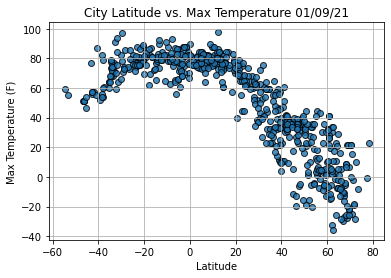

In [48]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

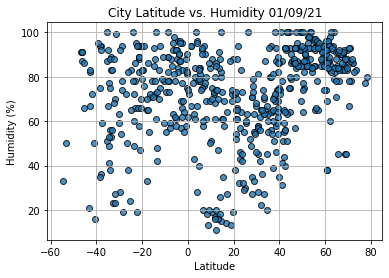

In [49]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()